<a href="https://colab.research.google.com/github/rahuljungbahadur/hands_on_ml_book/blob/main/Rnn_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [ ]:
ser1 = generate_time_series(1, 5)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
n_steps = 50
series = generate_time_series(10000, n_steps)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
import tensorflow as tf

In [ ]:
X_train.shape

(7000, 50, 1)

In [ ]:
y_pred = X_valid[:, -1]
np.mean(tf.keras.losses.mean_squared_error(y_valid, y_pred))

0.02146086

## Simple linear regression model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[50, 1]),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_valid, y_valid))

validation loss is 0.004. This is much better than the naive forecast error `mse` of 0.020

## SimpleRNN

In [ ]:
model=tf.keras.models.Sequential(
    [tf.keras.layers.SimpleRNN(units=1, input_shape=(None, 1))]
)

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 9ms/step - loss: 0.0569 - val_loss: 0.0459
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0377 - val_loss: 0.0307
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0249 - val_loss: 0.0206
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0170 - val_loss: 0.0152
Epoch 5/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0133 - val_loss: 0.0129
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0119 - val_loss: 0.0123
Epoch 7/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0115 - val_loss: 0.0120
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0113 - val_loss: 0.0120
Epoch 9/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0113 - val_loss: 0.0119
Epoch 10/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0112 - val_loss: 0.0119

## A deep SimpleRNN

In [ ]:
model_deepRnn = tf.keras.models.Sequential(
    [tf.keras.layers.SimpleRNN(units=20, return_sequences=True, input_shape=(None, 1)),
     tf.keras.layers.SimpleRNN(units=20, return_sequences=True),
     tf.keras.layers.SimpleRNN(units=1, return_sequences=False)]
)

In [ ]:
model_deepRnn.compile(optimizer='adam', loss='mse')
model_deepRnn.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 9s 30ms/step - loss: 0.0185 - val_loss: 0.0052
Epoch 2/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0041 - val_loss: 0.0034
Epoch 3/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 4/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 5/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 6/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 7/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 8/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 9/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 10/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0027 - val_lo

## SimpleRNN with `Dense` Layer at the end and no activation function

In [ ]:
model_deepRnnDense = tf.keras.models.Sequential(
    [tf.keras.layers.SimpleRNN(units=20, return_sequences=True, input_shape=(None, 1)),
     tf.keras.layers.SimpleRNN(units=20),
     tf.keras.layers.Dense(units=1)]
)


model_deepRnnDense.compile(optimizer='adam', loss='mse')
model_deepRnnDense.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 6s 22ms/step - loss: 0.0176 - val_loss: 0.0055
Epoch 2/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 3/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 4/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 5/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 6/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 7/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 8/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 9/10
219/219 [==============================] - 4s 19ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 10/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0029 - val_lo

## Creating predictions n steps in the future

Generate predictions and feed it back to the model for predicting the next timestep

In [ ]:
predictions = model_deepRnnDense.predict(X_test)

In [ ]:
predictions.shape

(1000, 1)

In [ ]:
predictions[0]

array([0.2250741], dtype=float32)

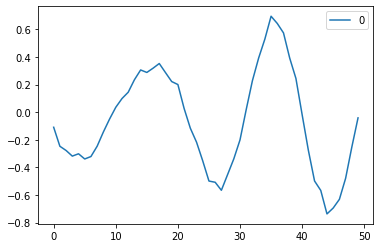

In [ ]:
pd.DataFrame(X_test[0]).plot(kind='line')

In [ ]:
## Generate time series for 1 batch and 50 steps

new_series = generate_time_series(1, 10)

In [ ]:
new_series.shape

(1, 10, 1)

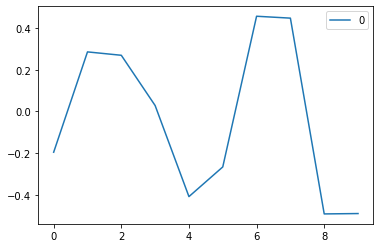

In [ ]:
pd.DataFrame(new_series[0]).plot()

In [ ]:
predicted1 = model_deepRnnDense.predict(new_series)
predicted1

array([[-0.8962373]], dtype=float32)

In [ ]:
predicted1.flatten()

array([-0.8962373], dtype=float32)

In [ ]:
X_new_series, y_new_series = X_test[157][:40,:], X_test[157][40:,:]
X_new_series.shape

(40, 1)

In [ ]:
X_new_series=X_new_series.reshape((1,40,1))

array([[0.39639023]], dtype=float32)

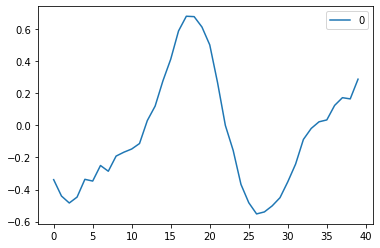

In [ ]:

pd.DataFrame(X_new_series[0]).plot()

model_deepRnnDense.predict(X_new_series)

In [ ]:
new_series=X_new_series

In [ ]:
series_pred=[]

for i in range(1,11):
  # print(i)
  pred_val = model_deepRnnDense.predict(new_series)
  new_series = new_series[:,1:,:]
  # print(new_series.shape)
  print((i, new_series.shape, pred_val.flatten()))
  series_pred.append(pred_val)

(1, (1, 39, 1), array([0.39639023], dtype=float32))
(2, (1, 38, 1), array([0.3931343], dtype=float32))
(3, (1, 37, 1), array([0.38657707], dtype=float32))
(4, (1, 36, 1), array([0.37638703], dtype=float32))
(5, (1, 35, 1), array([0.38206372], dtype=float32))
(6, (1, 34, 1), array([0.38399804], dtype=float32))
(7, (1, 33, 1), array([0.38994697], dtype=float32))
(8, (1, 32, 1), array([0.39250922], dtype=float32))
(9, (1, 31, 1), array([0.38089454], dtype=float32))
(10, (1, 30, 1), array([0.37348086], dtype=float32))


In [ ]:
y_new_series.shape

(10, 1)

In [ ]:
pred_array=np.concatenate(series_pred, axis=0)
pred_array

array([[0.39639023],
       [0.3931343 ],
       [0.38657707],
       [0.37638703],
       [0.38206372],
       [0.38399804],
       [0.38994697],
       [0.39250922],
       [0.38089454],
       [0.37348086]], dtype=float32)

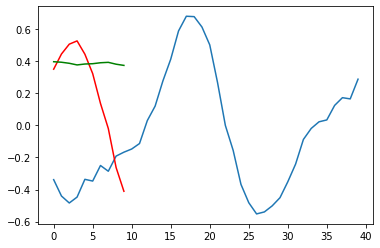

In [ ]:
plt.plot(X_new_series[0,:,:])
plt.plot(y_new_series, c='red')
plt.plot(pred_array, c='green')

## Another way to predict is to have the RNN itself output the next 10 sequences.

This is an example of Sequence-to-Sequence RNN.  

The advantage of this technique is that the loss will contain a term for the output of the RNN at each and every time step, not just the output at the last time step. This means there will be many more error gradients flowing through the model, and they won’t have to flow only through time; they will also flow from the output of each time step. This will both stabilize and speed up training.  


To turn the model into a sequence-to-sequence model, we must set return_sequences=True in all recurrent layers (even the last one), and we must apply the output Dense layer at every time step. Keras offers a TimeDistributed layer for this very purpose: it wraps any layer (e.g., a Dense layer) and applies it at every time step of its input sequence

In [ ]:
help(np.empty)

Help on built-in function empty in module numpy:

empty(...)
    empty(shape, dtype=float, order='C')
    
    Return a new array of given shape and type, without initializing entries.
    
    Parameters
    ----------
    shape : int or tuple of int
        Shape of the empty array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        Desired output data-type for the array, e.g, `numpy.int8`. Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: 'C'
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    
    Returns
    -------
    out : ndarray
        Array of uninitialized (arbitrary) data of the given shape, dtype, and
        order.  Object arrays will be initialized to None.
    
    See Also
    --------
    empty_like : Return an empty array with shape and type of input.
    ones : Return a new array setting values to one.
    zeros : Return a new array 

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [ ]:
model_deepRnn_MultiForeast = tf.keras.models.Sequential(
    [tf.keras.layers.SimpleRNN(units=20, return_sequences=True, input_shape=(None, 1)),
     tf.keras.layers.SimpleRNN(units=20, return_sequences=True),
     tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))]
)

### Create the error metric to be computed only at the end of the prediction

Since, we are now computing an output for 10 time steps, but, are only concerned about the error on the very last time step, we would need to create an error metric that computes mse for the very last timjestep of prediction

In [ ]:
import tensorflow as tf

In [ ]:
def last_step_error_metric(y_true, y_pred):
  return tf.keras.metrics.mean_squared_error(y_true[:,-1], y_pred[:,-1])

In [ ]:
model_deepRnn_MultiForeast.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                                   loss='mse',
                                   metrics=[last_step_error_metric])

In [ ]:
model_deepRnn_MultiForeast.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 7s 24ms/step - loss: 0.0526 - last_step_error_metric: 0.0417 - val_loss: 0.0405 - val_last_step_error_metric: 0.0276
Epoch 2/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0368 - last_step_error_metric: 0.0235 - val_loss: 0.0318 - val_last_step_error_metric: 0.0170
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0318 - last_step_error_metric: 0.0181 - val_loss: 0.0285 - val_last_step_error_metric: 0.0137
Epoch 4/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0292 - last_step_error_metric: 0.0155 - val_loss: 0.0288 - val_last_step_error_metric: 0.0147
Epoch 5/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0273 - last_step_error_metric: 0.0142 - val_loss: 0.0269 - val_last_step_error_metric: 0.0139
Epoch 6/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0258 - last_step_error_metric: 0.0127 - val_loss: 0.0236 - val_last_

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return tf.keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 6s 22ms/step - loss: 0.0508 - last_time_step_mse: 0.0400 - val_loss: 0.0429 - val_last_time_step_mse: 0.0324
Epoch 2/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0395 - last_time_step_mse: 0.0283 - val_loss: 0.0363 - val_last_time_step_mse: 0.0260
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0325 - last_time_step_mse: 0.0214 - val_loss: 0.0368 - val_last_time_step_mse: 0.0279
Epoch 4/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0298 - last_time_step_mse: 0.0188 - val_loss: 0.0273 - val_last_time_step_mse: 0.0155
Epoch 5/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0270 - last_time_step_mse: 0.0149 - val_loss: 0.0266 - val_last_time_step_mse: 0.0163
Epoch 6/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0250 - last_time_step_mse: 0.0123 - val_loss: 0.0248 - val_last_time_step_mse: 0.0122
Epoch 7/20
219/219 [==

In [ ]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

In [ ]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model_deepRnn_MultiForeast.predict(X_new)[:, -1][..., np.newaxis]

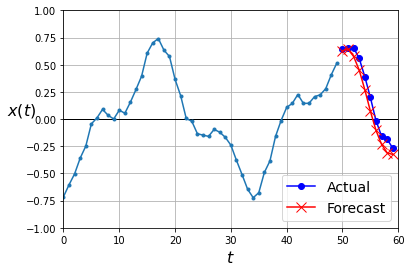

In [ ]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()  ## much better than individual time-step forecasts

## Handling long sequences

One way is to use the layer `keras.layer.LayerNormalization`.  

Let’s use tf.keras to implement Layer Normalization within a simple memory cell. For this, we need to define a custom memory cell. It is just like a regular layer, except its call() method takes two arguments: the inputs at the current time step and the hidden states from the previous time step. Note that the states argument is a list containing one or more tensors. In the case of a simple RNN cell it contains a single tensor equal to the outputs of the previous time step, but other cells may have multiple state tensors (e.g., an LSTMCell has a long-term state and a short-term state, as we will see shortly). A cell must also have a state_size attribute and an output_size attribute. In a simple RNN, both are simply equal to the number of units. The following code implements a custom memory cell which will behave like a SimpleRNNCell, except it will also apply Layer Normalization at each time step:

In [ ]:
class LNSimpleRNN(tf.keras.layers.Layer):

  def __init__(self, units, activation='tanh', **kwargs):
    
    super().__init__(**kwargs)
    self.state_size=units
    self.output_size=units
    self.simple_rnn=tf.keras.layers.SimpleRNN(units=units, activation=None)
    ## activation for the SimpleRNN is set to None cause we want the LayerNormalization to be applied at input and
    ## tanh at the state_output
    self.layer_norm = tf.keras.layers.LayerNormalization()
    self.activation=tf.keras.activations.get(activation)

    ## pass remaining key-value arguments to the super class
    

  def call(self, inputs, states):
    ## define the custom RNN layer
    output, state = self.simple_rnn(inputs, states)
    norm_output = self.activation(self.layer_norm(output))
    return norm_output, [norm_output] 
    


In [ ]:
## As given in the book
class LNSimpleRNNCell(tf.keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = tf.keras.layers.SimpleRNNCell(units,
                                                          activation=None)
        self.layer_norm = tf.keras.layers.LayerNormalization()
        self.activation = tf.keras.activations.get(activation)
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [ ]:
model_customLNSimpleRnn2 = tf.keras.models.Sequential([
     tf.keras.layers.RNN(LNSimpleRNN(20), return_sequences=True, input_shape=[None, 1]),
     tf.keras.layers.RNN(LNSimpleRNN(20), return_sequences=True),
     tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
                                                       
])

In [ ]:
## as given in the book
modelCustomRnn = tf.keras.models.Sequential([
    tf.keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                     input_shape=[None, 1]),
    tf.keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
])

In [ ]:
modelCustomRnn.layers

In [ ]:
modelCustomRnn.compile(optimizer='adam', loss='mse', metrics=[last_step_error_metric])

In [ ]:
modelCustomRnn.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))

Epoch 1/10
219/219 [==============================] - 13s 47ms/step - loss: 0.1479 - last_step_error_metric: 0.1340 - val_loss: 0.0707 - val_last_step_error_metric: 0.0628
Epoch 2/10
219/219 [==============================] - 10s 44ms/step - loss: 0.0627 - last_step_error_metric: 0.0506 - val_loss: 0.0575 - val_last_step_error_metric: 0.0432
Epoch 3/10
219/219 [==============================] - 10s 44ms/step - loss: 0.0544 - last_step_error_metric: 0.0425 - val_loss: 0.0519 - val_last_step_error_metric: 0.0395
Epoch 4/10
219/219 [==============================] - 10s 44ms/step - loss: 0.0497 - last_step_error_metric: 0.0381 - val_loss: 0.0489 - val_last_step_error_metric: 0.0376
Epoch 5/10
219/219 [==============================] - 10s 44ms/step - loss: 0.0464 - last_step_error_metric: 0.0337 - val_loss: 0.0441 - val_last_step_error_metric: 0.0326
Epoch 6/10
219/219 [==============================] - 10s 45ms/step - loss: 0.0421 - last_step_error_metric: 0.0295 - val_loss: 0.0404 - val

## Application of dropout layers

These can be used to get the confidence intervals

In [ ]:
model_dropout = tf.keras.models.Sequential(
    [tf.keras.layers.SimpleRNN(units=20, input_shape=(None, 1), return_sequences=True, recurrent_dropout=0.05, dropout=0.05),
     tf.keras.layers.SimpleRNN(units=20, return_sequences=True, recurrent_dropout=0.05, dropout=0.05),
     tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
     ]
)

In [ ]:
model_dropout.compile(optimizer='adam', loss='mse', metrics=[last_step_error_metric])

In [ ]:
model_dropout.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 9s 32ms/step - loss: 0.1000 - last_step_error_metric: 0.0958 - val_loss: 0.0496 - val_last_step_error_metric: 0.0401
Epoch 2/20
219/219 [==============================] - 7s 30ms/step - loss: 0.0578 - last_step_error_metric: 0.0498 - val_loss: 0.0442 - val_last_step_error_metric: 0.0339
Epoch 3/20
219/219 [==============================] - 7s 30ms/step - loss: 0.0523 - last_step_error_metric: 0.0429 - val_loss: 0.0411 - val_last_step_error_metric: 0.0294
Epoch 4/20
219/219 [==============================] - 7s 30ms/step - loss: 0.0492 - last_step_error_metric: 0.0390 - val_loss: 0.0392 - val_last_step_error_metric: 0.0284
Epoch 5/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0474 - last_step_error_metric: 0.0370 - val_loss: 0.0381 - val_last_step_error_metric: 0.0268
Epoch 6/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0461 - last_step_error_metric: 0.0349 - val_loss: 0.0366 - val_last_

In [74]:
mcmc_preds = []

for runs in range(100):
  mcmc_preds.append(model_dropout(X_test[0,:,:], training=True)[-1])

In [75]:
mcmc_preds=np.concatenate(mcmc_preds, axis=0)

In [76]:
mcmc_preds.shape

(100, 10)

In [101]:
X_test[0,:,:].shape

(50, 1)

In [93]:
testVal=Y_test[0,:,-1].reshape((50,1))


In [95]:
testVal.shape

(50, 1)

ValueError: ignored

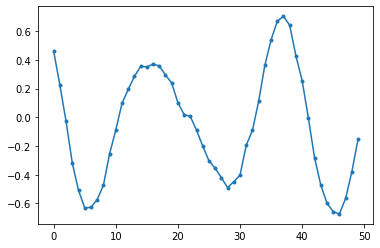

In [100]:
plot_series(X_test[0,:,:], y=testVal)

In [81]:
plot_multiple_forecasts(X_test[0,:,:],Y=Y_test[0,:,:], Y_pred=mcmc_preds[0])

IndexError: ignored

In [103]:
mcmc_preds.mean(axis=0)

array([-0.16485777, -0.17397736, -0.16506761, -0.15264687, -0.12531085,
       -0.09723809, -0.05663044, -0.02030492,  0.01618705,  0.06034582],
      dtype=float32)

In [106]:
np.sqrt(mcmc_preds.var(axis=0))

array([0.0464997 , 0.04916963, 0.04646168, 0.04274858, 0.03518553,
       0.02748126, 0.01619662, 0.00739012, 0.00771068, 0.01866429],
      dtype=float32)